In [11]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
from PIL import Image

In [2]:
# To find mean of an integer list
def Average(lst):
    return sum(lst) / len(lst)

In [3]:
#This is used to remove spaces from a string
def remove(string):
    return string.replace(" ", "")

In [4]:
# Euclidean distance is defined
def euc(a, b):
    dist = np.sqrt(np.sum(np.square(a - b), axis=1))
    mean = dist.mean()
    return mean

In [44]:
# IDs = ['03183','01877','01326','03140','02091','02301','02240','00382','02833','02078']
ID = '01877'

In [57]:
# results = []
# when len(IDs)==1:
y_train, y_test = [], [] 
# for ID in IDs:
    
# csv_path = '../../CSVs/MIT_unique/unique30_' + ID + '.csv'
csv_path = '../../CSVs/MIT_all/'+ ID + '.csv'

Model_1=pd.read_csv(csv_path)

# print(Model_1.shape)

## SHUFFLE & SPLIT SIZE
train, test = train_test_split(Model_1, test_size=0.3,random_state=42, shuffle=True)

a_train=train['Penultimate_Output']
b_train=train['GT_Value']
a_test=test['Penultimate_Output']
b_test=test['GT_Value']
    
for i in range(0,len(a_train)):
    lis=[]
    a_train.iloc[i]=remove(a_train.iloc[i])
    x=a_train.iloc[i]
    a=x.split(',')
    x=a[0]
    x=x[9:]
    x1=a[1]

    x2=a[2]

    x3=a[3]
    x3=x3[0:-2]

    lis.append(float(x))
    lis.append(float(x1))
    lis.append(float(x2))
    lis.append(float(x3))
    a_train.iloc[i]=lis

for i in range(0,len(a_test)):
    lis=[]
    a_test.iloc[i]=remove(a_test.iloc[i])
    x=a_test.iloc[i]
    a=x.split(',')
    x=a[0]
    x=x[9:]
    x1=a[1]

    x2=a[2]

    x3=a[3]
    x3=x3[0:-2]

    lis.append(float(x))
    lis.append(float(x1))
    lis.append(float(x2))
    lis.append(float(x3))
    a_test.iloc[i]=lis
for i in range(0,len(b_train)):
    lis=[]
    x=b_train.iloc[i]
    a=x.split(',')
    x1=a[0]
    x1=x1[9:]
    x2=a[1]
    x2=x2[0:-2]
    lis.append(float(x1))
    lis.append(float(x2))
    b_train.iloc[i]=lis
for i in range(0,len(b_test)):
    lis=[]
    x=b_test.iloc[i]
    a=x.split(',')
    x1=a[0]
    x1=x1[9:]
    x2=a[1]
    x2=x2[0:-2]
    lis.append(float(x1))
    lis.append(float(x2))
    b_test.iloc[i]=lis
# for i in range(0,len(a_train)):
#     a_train.iloc[i]=np.array(a_train.iloc[i])

# for i in range(0,len(b_train)):
#     b_train.iloc[i]=np.array(b_train.iloc[i])
    
y_train.extend(b_train)
y_test.extend(b_test)

#     a_train = a_train.apply(pd.Series)

#     b_train = b_train.apply(pd.Series)

#     reg = MultiOutputRegressor(SVR())

#     parameters = {'estimator__C': [20],  
#                   'estimator__gamma': [0.06], 
#                   'estimator__kernel': ['rbf'],
#                  'estimator__epsilon':[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]}  
#     custom_scorer = make_scorer(euc, greater_is_better=False)
    
#     ## Applying grid search to the dataset
#     grid_reg = GridSearchCV(estimator=reg,
#                           param_grid=parameters,
#                           scoring=custom_scorer,
#                             cv=3,
#                           verbose=1)
#     grid_reg.fit(a_train,b_train)
    
#     best_para = grid_reg.best_params_#Finding the best parameter
#     epsilon_SVR=best_para['estimator__epsilon']#Extracting epsilon value which has the lowest EUC
    
#     # print(best_para)
    
#     ## Converting test set into panda series
#     for i in range(0,len(a_test)):
#         a_test.iloc[i]=np.array(a_test.iloc[i])
#     for i in range(0,len(b_test)):
#         b_test.iloc[i]=np.array(b_test.iloc[i])


#     a_test = a_test.apply(pd.Series)
#     b_test = b_test.apply(pd.Series)
#     reg = MultiOutputRegressor(SVR(C=20,epsilon=epsilon_SVR,gamma=0.06,kernel='rbf'))
    
#     ## Fitting the Model
#     reg.fit(a_train,b_train)
    
#     y_pred = reg.predict(a_test)
    
#     MED=euc(y_pred,b_test)

#     # print(MED)
#     # print(f'------------->ID: {ID} - MED: {MED}')
    
#     results.append(MED)

In [58]:
gt_train = np.array(y_train)
gt_test = np.array(y_test)
# pts_train = np.unique(gt_train, axis=0)
# pts_test = np.unique(gt_test, axis=0)
len(gt_train), len(gt_test)

(602, 258)

(-13.0, 0.2)

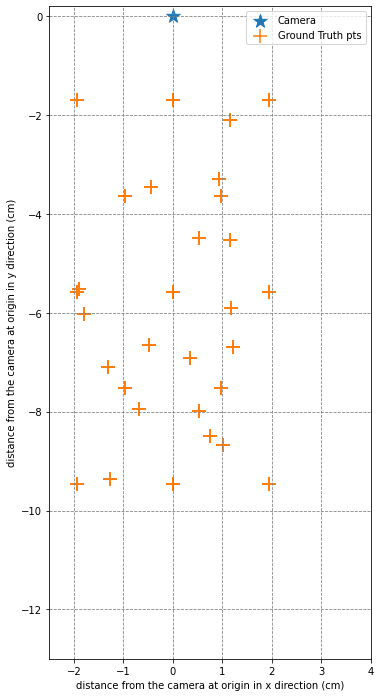

In [59]:
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
# plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(gt_train[:,0], gt_train[:,1], marker='+', s=200)
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
# plt.title("")
plt.legend(['Camera', 'Ground Truth pts']);
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)
# plt.savefig('../../plots/svr30_21gt.png')

(-13.0, 0.2)

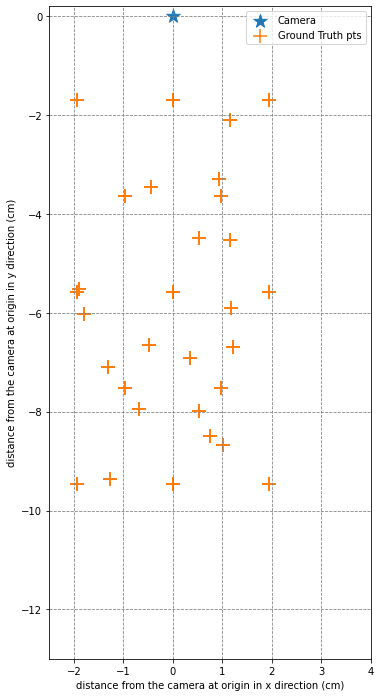

In [60]:
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
# plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(gt_test[:,0], gt_test[:,1], marker='+', s=200)
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
plt.legend(['Camera', 'Ground Truth pts']);
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)
# plt.savefig('../../plots/svr30_9gt.png')

(-13.0, 0.2)

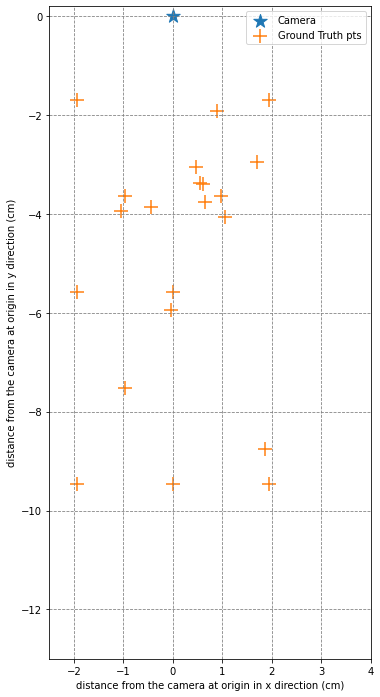

In [52]:
plt.figure(figsize=(12,12))
plt.grid(color='gray', linestyle='dashed')
plt.scatter(0, 0, marker='*', s=200)
# plt.scatter(preds[:,0], preds[:,1], c=cols, s=10)
plt.scatter(pts[:,0], pts[:,1], marker='+', s=200)
plt.xlabel('distance from the camera at origin in x direction (cm)')
plt.ylabel('distance from the camera at origin in y direction (cm)')
# plt.title("")
plt.legend(['Camera', 'Ground Truth pts']);
plt.axis('scaled')
plt.xlim(-2.5, 4)
plt.ylim(-13, 0.2)
# plt.savefig('../../plots/svr30_21gt.png')

In [34]:
for x in results:
    print(round(x, 3))

1.269
1.687
1.801
1.881
3.07
1.377
1.593
2.709
1.402
1.492


In [35]:
average = Average(results) 
round(average,3)

1.828